In [2]:
import chess
import sqlite3
import chess.pgn
import chess.engine
import stockfish
import chess.polyglot
import asyncio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 


2.57284878984837
2.520296532620396
2.05592980456461
1.9207433520396837
1.9789024631985017
1.8279435737111618


C:\Users\samue\AppData\Local\Temp\ipykernel_4840\2857031627.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['rook bad','rook good','queen bad','queen good','bishop bad','bishop good'])


(0.6992865480556532, 7.300033973902112)


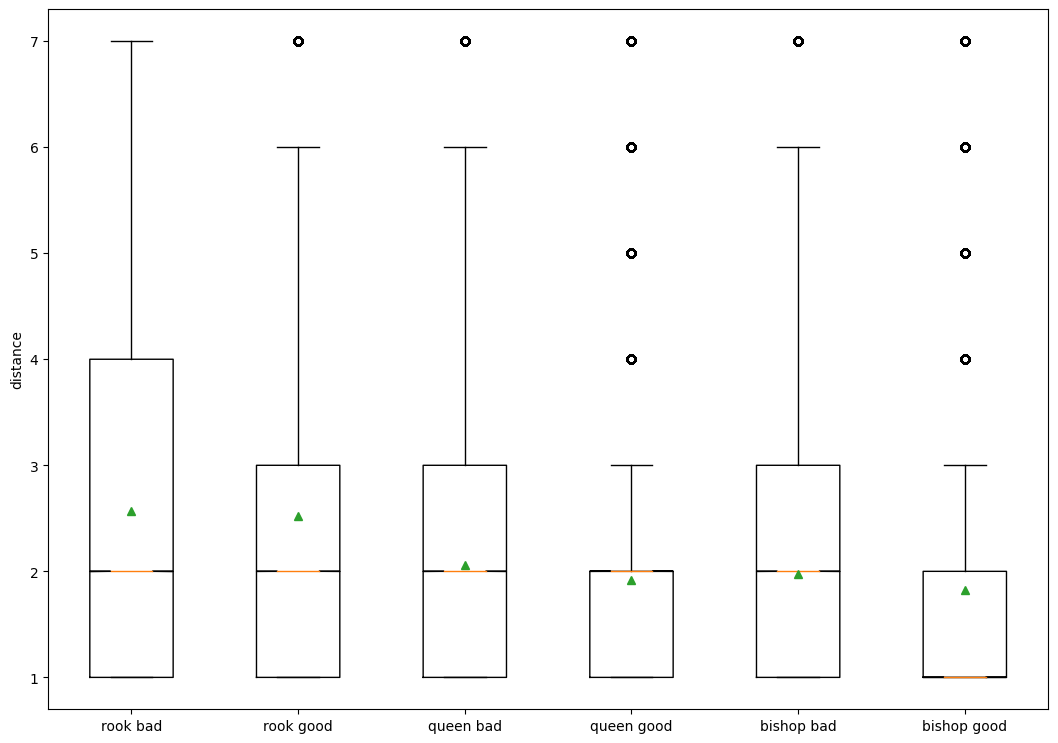

In [4]:
db = sqlite3.connect("gameheaders.db")

pieces = ['rook','queen','bishop']
data = []
for i in range(len(pieces)):
    query = "select distance from allmoves join gameExtraData using (tell) where piece='"+pieces[i]+"' and avgrating <=1200;"
    d = pd.read_sql_query(query,db).to_numpy().ravel()
    print(d.mean())
    data.append(d)
    query = "select distance from allmoves join gameExtraData using (tell) where piece='"+pieces[i]+"' and avgrating >=1800;"
    d = pd.read_sql_query(query,db).to_numpy().ravel()
    print(d.mean())
    data.append(d)
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['rook bad','rook good','queen bad','queen good','bishop bad','bishop good'])
ax.set_ylabel('distance')
 
# Creating plot
bp = ax.boxplot(data,notch='True',showmeans=True)

print(ax.get_ylim())
 
# show plot
plt.savefig('results/plots/distance_distribution.png')
plt.show()


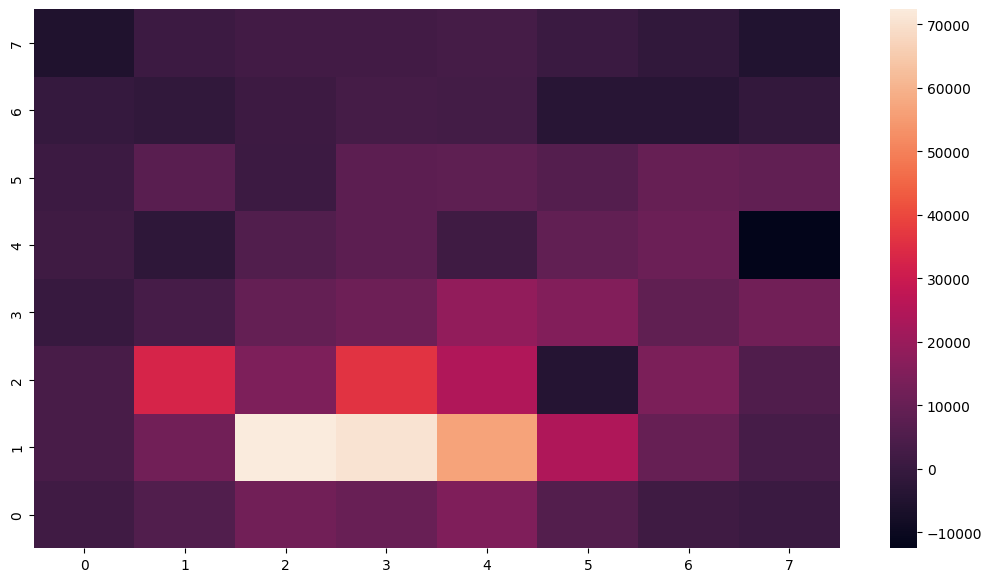

In [11]:
df = pd.read_csv('results/piece_to_square_counts_by_side_by_skill.csv')
#df = pd.read_csv('results/piece_to_square_counts.csv')
piece = 'queen'
nparray = df[(df.piece==piece) & (df.turn=="White") & (df.Skill=="Bad")].to_numpy()[:,[0,1,3]]


# df = pd.read_csv('results/piece_to_square_counts.csv')
# nparray = df[(df.piece=="knight")].to_numpy()[:,[0,1,3]]

results1 = nparray[:,2].reshape(8,8).astype('float')

nparray = df[(df.piece==piece) & (df.turn=="White") & (df.Skill=="Good")].to_numpy()[:,[0,1,3]]

results2 = nparray[:,2].reshape(8,8).astype('float')

results = results2-results1
# Define the plot
fig, ax = plt.subplots(figsize=(13,7))

# Use the heatmap function from the seaborn package
ax = sns.heatmap(results)
ax.invert_yaxis()

# Display the Pharma Sector Heatmap
plt.show()

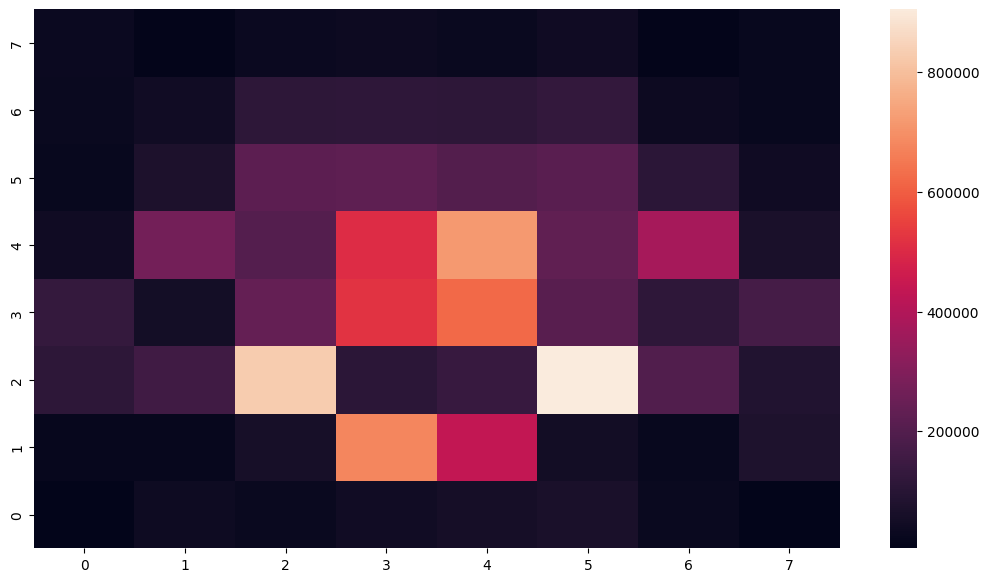

In [12]:

df = pd.read_csv('results/piece_to_square_counts_by_side.csv')
#df = pd.read_csv('results/piece_to_square_counts.csv')

nparray = df[(df.piece=="knight") & (df.turn=="White")].to_numpy()[:,[0,1,3]]

# df = pd.read_csv('results/piece_to_square_counts.csv')
# nparray = df[(df.piece=="knight")].to_numpy()[:,[0,1,3]]

results = nparray[:,2].reshape(8,8).astype('float')


# Define the plot
fig, ax = plt.subplots(figsize=(13,7))

# Use the heatmap function from the seaborn package
ax = sns.heatmap(results)
ax.invert_yaxis()

# Display the Pharma Sector Heatmap
plt.show()